# Data Analysis & Visualisation - Data Analyst Jobs in USA


### Please make sure to follow all the instructions written and run code in sequential order.

# Installing Packages and library needed to run the Project

In [1]:
# Please make sure you have installed all these packages and library to run the project
#You can either install through Jupyter Notebook or in terminal.

! pip install --upgrade pip
! pip install --user kaggle
! pip install numpy
! pip install matplotlib
! pip install sqlite3

Requirement already up-to-date: pip in /Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages (20.2.3)
ERROR: Could not find a version that satisfies the requirement sqlite3 (from versions: none)
ERROR: No matching distribution found for sqlite3


# Importing the library needed for the project

In [2]:
# storing cleaned data in sqlite
import csv 
import os
import numpy as np
import math

import sqlite3
from sqlite3 import Error

# plots and graph
from matplotlib import pyplot as plt

import kaggle


# Declaration of variables

In [3]:
current_dir = os.getcwd()
folder_name = 'data'
save_image = 'img'
json_folder = 'json'
filename = f'{current_dir}/{folder_name}/DataAnalyst.csv'


# actual columns in csv file 
column_map = {
    ' ': 0,
    'Job Title' : 1,
    'Salary Estimate' : 2,
    'Job Description': 3,
    'Rating': 4,
    'Company Name':5,
    'Location':6,                   
    'Headquarters':7, 
    'Size': 8,
    'Founded': 9,
    'Type of ownership': 10,
    'Industry': 11, 
    'Sector': 12, 
    'Revenue':13, 
    'Compeititors':14, 
    'Easy Apply':15
}


columns_to_be_cleaned = [column_map['Rating'],column_map['Headquarters'],column_map['Size'],column_map['Founded'],column_map['Type of ownership'],
                         column_map['Industry'], column_map['Sector'], column_map['Revenue'], column_map['Compeititors'],
                         column_map['Easy Apply'], column_map['Job Description']
                        ]

rows_to_store_in_db = 2250

unknown_value = ['-1', '0' ,'Unknown' , '-1.0' ,'Unknown / Non-Applicable','1']

table_name = 'dataAnalystJob'

## Download CSV File from Kaggle.com on local machine using kaggle.api()
       Please follow the instruction to download file:
           1) download the API Key json file from you kaggle account (Already downloaded and placed in json folder) 
           
            (If you want to download your own API key JSON file , first create the account on kaggle site and then from profile                   section create a new API key and put that JSON file under json folder.)
            
            The below setps will be done using the code, you dont need to do anything else, just run the cell.
           2) create a directory in ~/.kaggle
           3) Move the kaggle.json file to  ~/.kaggle/kaggle.json
           4) Using kaggle.api() download the file, for details see function download_csv()
           
           For more details: https://github.com/Kaggle/kaggle-api

In [4]:
#change the permission for users : 
#Permissions of 600 mean that the owner has full read and write access to the file, 
#while no other user can access the file
def encode_json_file():
    ! chmod 600 $json_folder/kaggle.json

# create a directoy in user folder
def create_kaggle_folder():
    encode_json_file()
    ! mkdir ~/.kaggle

# move the kaggle.json folder to the above created folder
def move_json_file():
    ! mv $json_folder/kaggle.json  ~/.kaggle/kaggle.json
    print("File moved !!")
    

In [5]:
create_kaggle_folder()

mkdir: /Users/nitikakuhar/.kaggle: File exists


In [6]:
move_json_file()

File moved !!


In [ ]:
# we are not using this function to download file, although we can download using this.
# This function bascially download file using kaggle CLI

#def download_dataset():
    #create_kaggle_folder()
    #move_json_file()
    #encode_json_file()
    
    #! kaggle datasets download  andrewmvd/data-analyst-jobs --unzip -f DataAnalyst.csv 

In [9]:
def download_csv():
    print("File Downloading ...")
    kaggle.api.authenticate()
    d = kaggle.api.dataset_download_files(dataset="andrewmvd/data-analyst-jobs", path = folder_name,unzip=True)
    print("File Downloaded in folder data/!! Please Refresh Folder. Thank You")

In [10]:
download_csv()

File Downloading ...
File Downloaded in folder data/!! Please Refresh Folder. Thank You


In [ ]:
# If the dataset failed to download, please copy the DataAnalyst.csv file from current folder to data folder

# Creating connection with database

In [11]:
# create database
def sql_connection():
    try:
        conn = sqlite3.connect('dataAnalystJobProject.db')
        print("Connection is established !!")
        return conn
    except Error:
        print("Erroe while connecting with database: ", Error)

In [12]:
#create table 
def create_sql_table(conn):
    #create cursor object, to excute methods
    cursor_obj = conn.cursor()
    
    create_query = '''CREATE TABLE dataAnalystJob (id integer PRIMARY KEY,  job_title VARCHAR, min_salary integer, max_salary integer,
                        rating float, company_name VARCHAR,location_city VARCHAR,
                        location_state VARCHAR,headquarters VARCHAR, size VARCHAR, founded VARCHAR , type_of_ownership VARCHAR, 
                        industry VARCHAR, sector VARCHAR, competitors VARCHAR, easy_apply VARCHAR)'''
    
    cursor_obj.execute(create_query)
    
    conn.commit()
    print("Table created in database..!!")

In [13]:
# close connection
def close_database_connection(conn):
    conn.close()
    print("Database connection closed!")

In [14]:
# creating database 'dataAnalystJobProject' and connection
conn = sql_connection()

Connection is established !!


In [15]:
# creating table in database
create_sql_table(conn)

Table created in database..!!


In [19]:
#insert rows in table
def insert_data_in_table(conn, values):
    
    cursor_obj = conn.cursor()
    
    insert_query = f'''INSERT INTO dataAnalystJob ( id, job_title, min_salary, max_salary, rating, company_name, 
                    location_city, location_state, headquarters, size, founded, type_of_ownership, industry, sector, 
                    competitors, easy_apply)
                    VALUES(?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?)
                '''
    
    cursor_obj.execute(insert_query, values)
    
    conn.commit()

# Functions for data cleaning

In [18]:
# split salary into minimum and maximun salary
def split_salary_column(sal):
    s = []
    K = 1000
    sal = sal.split('-')
    
    min_sal = (sal[0])
    if(min_sal.endswith('K')):
        min_sal = min_sal[1:len(min_sal)]
        min_sal = int(min_sal[0:len(min_sal) - 1]) * K
    else:
        min_sal = None
    
    if(len(sal[1].split()) > 1):
        
        max_sal = ((sal[1]).split())[0]
        max_sal = max_sal[1:len(max_sal)]
        max_sal = int(max_sal[0:len(max_sal) - 1]) * K
    else: 
        max_sal = None
        
    s.extend([min_sal, max_sal])
    return s

##############################################################################################################
# removing ratings from company name 
def remove_rating_from_company_name(c_name):
    c_name = c_name.split("\n")
    return c_name[0]
    
    
##############################################################################################################
# if value is -1 then replaced it with None
def clean_unknown_col_values(val):
    if val in unknown_value:
        return None
    else:
        return val

##############################################################################################################    

def split_location_in_city_state(location):
    location = location.split(',')
    return location

##############################################################################################################

def convert_rating(rating):
    r = float(rating)
    if(r > 0):
        return r
    else:
        return None
    
##############################################################################################################

def remove_employee_from_size(val):
    if val in unknown_value:
        return None
    else:
        return val.split(' e')[0]

##############################################################################################################

def clean_type_of_ownership(val):
    
    if val in unknown_value:
        val = None
    else:
        
        val = val.split('-')
        if len(val) > 1:
            val = val[1].strip()
        else : 
            val = val[0].strip()
        
    return val

# Inserting records in database after Cleaning

In [20]:
# cleaning data and storing in new array.
def data_cleaning():
    print(f"Data cleaning for {rows_to_store_in_db} rows started...\n")
    with open(filename, 'r',) as file:
        reader = csv.reader(file, delimiter=',')
    
        headers = next(reader)
 
        data = np.array(list(reader)).astype(str)
    
        print(f"Data cleaning in process, Please wait for a while...\n")
        for row_num in range(0,len(data)):
        
            if row_num <= rows_to_store_in_db:
                row_value = data[row_num]
                row = []
                for col in range(0,len(row_value)):
                    r = row_value
                    if col == 0:
                        row.append(int(r[col]))
                    
                    elif col in columns_to_be_cleaned:
                        
                        if col == column_map['Rating']:
                            r[col] = convert_rating(r[col])
                            
                        elif col == column_map['Size']:
                            r[col] = remove_employee_from_size(r[col])
                            
                        elif col == column_map['Job Description']:
                            # do nothing just skip the row  
                            pass
                        elif col == column_map['Revenue']:
                            # do nothing just skip the row  
                            pass
                        elif col == column_map['Type of ownership']:
                            r[col] = clean_type_of_ownership(r[col])
                        else:
                            r[col] = clean_unknown_col_values(r[col])
                        
                        row.append(r[col])
                        
                    elif col == column_map['Job Title']:
                        title = r[col].split(',')[0]
                        row.append(title)
                        
                    elif col == column_map['Salary Estimate']:
                        sal = split_salary_column(r[col])
                        row.append(sal[0])
                        row.append(sal[1])
                        
                    elif col == column_map['Company Name']:
                        c_name = remove_rating_from_company_name(r[col])
                        row.append(c_name)
                                   
                    elif col == column_map['Location']:
                        loc = split_location_in_city_state(r[col])
                        row.append(loc[0].strip())  
                        row.append(loc[1].strip())
                    else:
                        row.append(r[col])
                row.pop(4)  # to remove the job description column  
                row.pop(15) # to remove the revenue column
                
                #inserting rows in table one by one
                insert_data_in_table(conn,row)
        
    print(f"{rows_to_store_in_db} rows cleaned and stored in database")
    
    # closing the connection
    close_database_connection(conn)

In [21]:
data_cleaning()

Data cleaning for 2250 rows started...

Data cleaning in process, Please wait for a while...

2250 rows cleaned and stored in database
Database connection closed!


# Data Analysis and Visualisations Functions:

### Set color for bars :
        It takes 2 parameter (list of bars, color)


In [22]:
def set_color_for_graph(bar_list, color):
    
    for key in range(0,len(bar_list)):
        bar_list[key].set_color(color)
        

### Set label for bars :
        It takes 2 parameter (list of bars, the instance of subplot)
       

In [23]:
def autolabel(bars,ax):
    for bar in bars:
        h = bar.get_height()
        ax.text(bar.get_x()+bar.get_width()/2., 1*h, '%d'%int(h),
                ha='center', va='bottom')

### Set points for graph plotting :
        It takes 9 parameters (records : to get the value for x_axis and y_axix, 
                                key for x axis, key for y axis, title, x axis label, y axis labe,
                                name for the image file, y2 axix value, legend text array
                                )

In [24]:
def set_points_for_graph(records, x_axis_key, y_axis_key, title, x_label, y_label, img_filename,y2_axis_key, legend_text_arr):
    
    x_axis_points = []
    y_axis_points = []
    y2_axis_points = []
    for index in range(0,len(records)):
        r = list(records[index])
        
        for key in range(0,len(r)):
            if key == x_axis_key:
                x_axis_points.append(r[key])
                
            if key == y_axis_key:
                y_axis_points.append(r[key])
            
            if y2_axis_key and key == y2_axis_key:
                y2_axis_points.append(r[key])

    plot_graph(x_axis_points, y_axis_points,title, x_label, y_label, img_filename,y2_axis_points, legend_text_arr)
    

### Graph Plotting function:
        It takes 8 parameters (x coordinates, y coordinates,title for graph, x label , y label, image file name, 
        y2 axis array, legend text array)

In [25]:
def plot_graph(x_axis, y1_axis, title, x_label, y_label, img_filename, y2_axis, legend_text_arr):
    
 
    N = len(y1_axis)
    ind = np.arange(N)
    width = 0.45
    bar_lst = []
    legend_text = []
    
    # Initialize a Figure 
    fig = plt.figure(figsize=(20,10)) # plt.figure(figsize=(width,height))
    
    plot_graph = fig.add_subplot(111)
    
    if len(y2_axis):
        w = width
        
        bar_one = plot_graph.bar(ind-w,y1_axis, width)
        autolabel(bar_one, plot_graph)
        set_color_for_graph(bar_one,'y')
        
        
        bar_two = plot_graph.bar(ind,y2_axis, width)
        set_color_for_graph(bar_two,'green')
        autolabel(bar_two, plot_graph)
        
        
        plot_graph.set_xticks(ind-0.2)
        bar_lst.extend([bar_one[0],bar_two[0]])
        
        legend_text.extend([legend_text_arr[0], legend_text_arr[1]])
  
        
    else:
        w = 0
        
        bar_one = plot_graph.bar(ind-w,y1_axis, width) # inorder to customise the bar width
        
        set_color_for_graph(bar_one,'y')
        
        autolabel(bar_one, plot_graph)
        
        
        plot_graph.set_xticks(ind)
        
        bar_lst.append(bar_one[0])
        legend_text.append(legend_text_arr)
        
        
    
    plot_graph.set_title(title, fontweight='bold', fontsize='10', loc='right')
    plot_graph.set_xlabel(x_label, fontweight='bold', fontsize='15')
    plot_graph.set_ylabel(y_label, fontweight='bold', fontsize='15')
    
    
    plot_graph.legend( (bar_lst), (legend_text_arr))
    

    
    xTickMarks = x_axis
    
    xtickNames = plot_graph.set_xticklabels(xTickMarks)
    
    plt.setp(xtickNames, rotation=90, fontsize=12)
     
    # to save image inside folder img/
    plt.savefig(f'{save_image}/{img_filename}.png',transparent=True, bbox_inches='tight', pad_inches=0.3)
    
    # Show the plot
    plt.show()
    

### Print data in tabular format :
        It takes 2 parameters (column header name, rows)

In [26]:
# print data in tabular
def print_data_for_tier_two_analysis(header_data, row_data):   
    
    dash = '-' * 120
    print(dash,"\n")
    
    
    if len(header_data) > 2:
        format_table_header = "{:<25s}"
        format_table_row = "{:<30}"
    else:
        format_table_header = "{:>25s}"
        format_table_row = "{:>30}"
    
    for h in header_data:
        print(format_table_header.format(h), end ="\t ")
    
    print("\n")
    print(dash)
    print("\n") 

    # To print rows
    for r in range(0,len(row_data)):
        
        col = row_data[r]
        
        for c in range(0,len(col)):
            print(format_table_row.format(col[c]), end ="\t")
        
        print("\n")

# Tier 1 Analysis

### Print  data in tabular format for tier 1 analysis:

In [27]:
def print_tier_one_analysis(header_data, row_data):
    dash = '-' * 50
    row = list(row_data[0])
    print(dash,"\n")
    
    print("{:<25}".format(header_data[0]), end ="\n")
    
    print(dash,"\n")
    
    print("{:<25}".format(row[0]), end ="\n")

### Total number of Data Analyst Jobs In USA :

In [28]:
def get_total_number_of_jobs():
    conn = sql_connection()
    
    select_query = f'''SELECT COUNT(job_title) as total_nums_of_job 
                        FROM {table_name};
                    '''
    
    cursor_obj = conn.cursor()
    
    cursor_obj.execute(select_query)
    
    rows = cursor_obj.fetchall()
    
    close_database_connection(conn)
    
    
    #print data in tabular form
    print("\n\n************** Tabular Representation ***************** \n\n")
    header_data = ['Total Data Analyst Related Jobs']
    print_tier_one_analysis(header_data, rows)
 
    

In [29]:
get_total_number_of_jobs()

Connection is established !!
Database connection closed!


************** Tabular Representation ***************** 


-------------------------------------------------- 

Total Data Analyst Related Jobs
-------------------------------------------------- 

2251                     


### Total Number of company currently open for hiring

In [30]:
def get_currently_available_jobs():
    conn = sql_connection()
    
    select_query = f'''SELECT COUNT(company_name) as currently_available_company 
                        FROM  {table_name} WHERE easy_apply != 'None';
                    '''
    
    cursor_obj = conn.cursor()
    
    cursor_obj.execute(select_query)
    
    rows = cursor_obj.fetchall()
    
    close_database_connection(conn)
    
    
    #print data in tabular form
    print("\n\n************** Tabular Representation ***************** \n\n")
    header_data = ['Total No. Of Company Currently Hiring ']
    print_tier_one_analysis(header_data, rows)

In [31]:
get_currently_available_jobs()

Connection is established !!
Database connection closed!


************** Tabular Representation ***************** 


-------------------------------------------------- 

Total No. Of Company Currently Hiring 
-------------------------------------------------- 

80                       


### Average salary for Data analyst jobs in USA

In [32]:
def get_average_salary():
    conn = sql_connection()
    
    select_query = f'''SELECT  ROUND((avg(max_salary) + avg(min_salary)) / 2, 2) as average_salary 
                        FROM {table_name};
                    '''
    
    cursor_obj = conn.cursor()
    
    cursor_obj.execute(select_query)
    
    rows = cursor_obj.fetchall()
    
    close_database_connection(conn)
    
    
    #print data in tabular form
    print("\n\n************** Tabular Representation ***************** \n\n")
    header_data = ['Average Salary For Analyst Job (In USD) Annually']
    print_tier_one_analysis(header_data, rows)
 

In [33]:
get_average_salary()

Connection is established !!
Database connection closed!


************** Tabular Representation ***************** 


-------------------------------------------------- 

Average Salary For Analyst Job (In USD) Annually
-------------------------------------------------- 

72106.22                 


### Minimum Salary for Data Analyst Jobs In USA:

In [34]:
def get_min_salary():
    conn = sql_connection()
    
    select_query = f'''SELECT min(min_salary) as min_salary 
                        FROM {table_name};
                    '''
    
    cursor_obj = conn.cursor()
    
    cursor_obj.execute(select_query)
    
    rows = cursor_obj.fetchall()
    
    close_database_connection(conn)
    
    
    #print data in tabular form
    print("\n\n************** Tabular Representation ***************** \n\n")
    header_data = ['Minimum Salary For Analyst Job (In USD) Annually']
    print_tier_one_analysis(header_data, rows)

In [35]:
get_min_salary()

Connection is established !!
Database connection closed!


************** Tabular Representation ***************** 


-------------------------------------------------- 

Minimum Salary For Analyst Job (In USD) Annually
-------------------------------------------------- 

24000                    


### Maximum salary for Data analyst job in USA

In [37]:
def get_max_salary():
    conn = sql_connection()
    
    select_query = f'''SELECT max(max_salary) as max_salary 
                        FROM {table_name};
                    '''
    
    cursor_obj = conn.cursor()
    
    cursor_obj.execute(select_query)
    
    rows = cursor_obj.fetchall()
    
    close_database_connection(conn)
    
    
    #print data in tabular form
    print("\n\n************** Tabular Representation ***************** \n\n")
    header_data = ['Maximum Salary For Analyst Job (In USD) Annually']
    print_tier_one_analysis(header_data, rows)

In [38]:
get_max_salary()

Connection is established !!
Database connection closed!


************** Tabular Representation ***************** 


-------------------------------------------------- 

Maximum Salary For Analyst Job (In USD) Annually
-------------------------------------------------- 

190000                   


# Tier 2 Analysis

## Min and Max salary by job title Data Analyst

In [39]:
def get_min_max_salary_by_job_title():
    conn = sql_connection()
    
    select_query = f'''SELECT job_title, min_salary, max_salary, location_city
                        FROM {table_name} 
                        WHERE job_title LIKE '% Data Analyst %' AND location_state = 'CA'
                        GROUP BY job_title
                        ORDER BY location_city ASC
                        LIMIT 15;'''
    
    cursor_obj = conn.cursor()
    
    cursor_obj.execute(select_query)
    
    rows = cursor_obj.fetchall()
    
    close_database_connection(conn)
    
    #print data in tabular form
    print("\n\n************** Tabular Representation ***************** \n\n")
    header_data = ['Job Title', 'Min Salary','Max Salary','City']
    print_data_for_tier_two_analysis(header_data, rows)
    
   
    job_title = 0
    min_salary = 1
    max_salary = 2
   
    
    #set point for graph to draw graph for the above table
     
    title = "Min & Max Salary by Job Title"
    x_label = "Jobs Title"
    y_label = "Salary (IN USD )"
    legend_text_arr = ['Min Salary', 'Max Salary']
    
    print("\n\n***************** Graph Representation ********************* \n\n")
    set_points_for_graph(rows,job_title, min_salary, title, x_label, y_label, title,max_salary, legend_text_arr)
    

Connection is established !!
Database connection closed!


************** Tabular Representation ***************** 


------------------------------------------------------------------------------------------------------------------------ 

Job Title                	 Min Salary               	 Max Salary               	 City                     	 

------------------------------------------------------------------------------------------------------------------------


Radar Telemetry Data Analyst - RT	113000                        	132000                        	Anaheim                       	

German Speaking Data Analyst J	58000                         	93000                         	Cupertino                     	

Systems and Data Analyst - SQL	42000                         	66000                         	Duarte                        	

Jr. Data Analyst (Jr. DA)     	42000                         	66000                         	Glendale                      	

Sr. Data Analyst (P

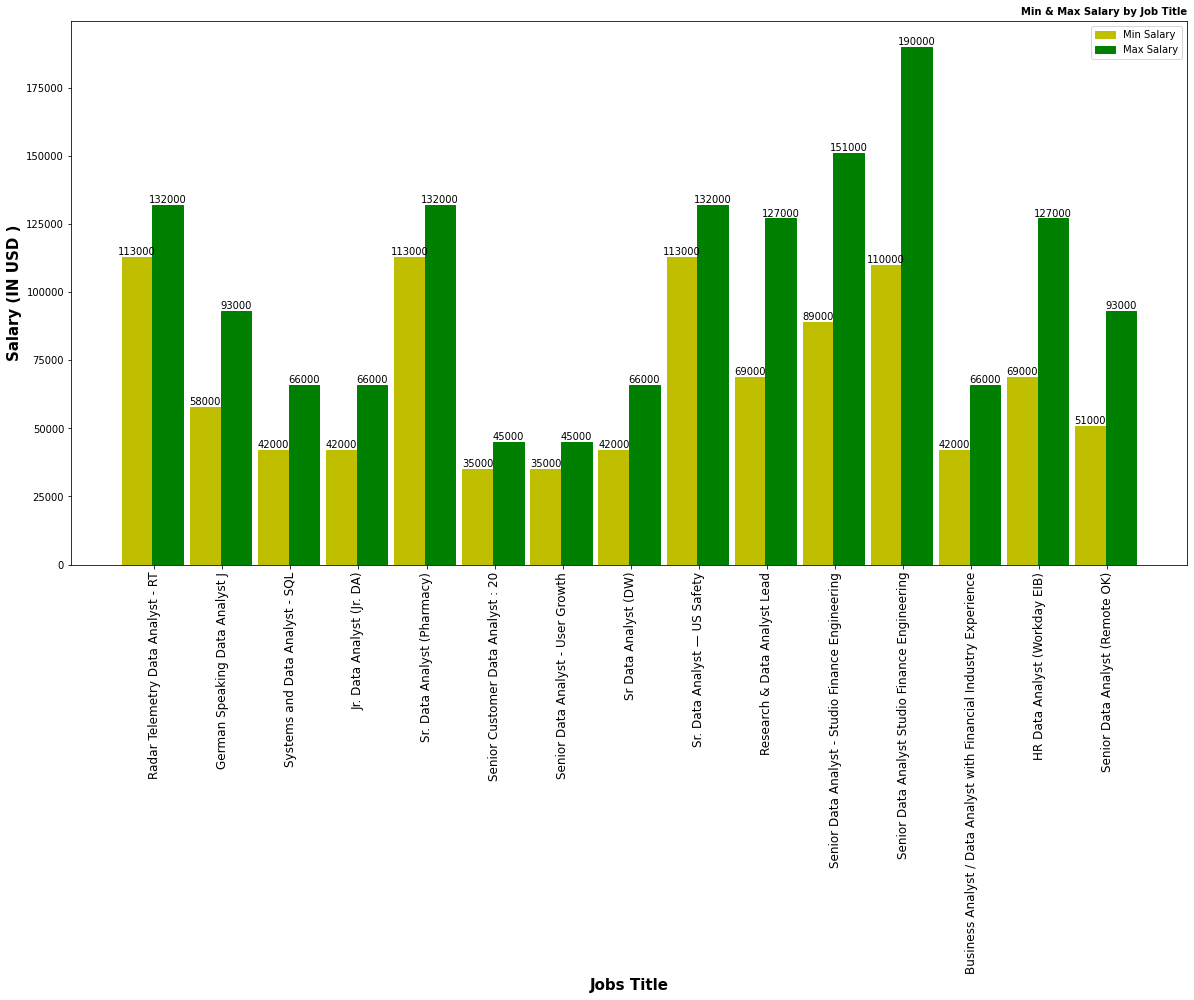

In [40]:
get_min_max_salary_by_job_title()

## Top companies By Rating For Data Analyst Job

In [41]:
def get_company_by_rating():
    conn = sql_connection()
    
    select_query = f'''SELECT company_name, rating,location_city, location_state
                        FROM {table_name}  
                        WHERE job_title LIKE 'Data Analyst%' AND rating != 'None'
                        GROUP By rating ORDER BY rating DESC
                        LIMIT 15;'''
    
    cursor_obj = conn.cursor()
    
    cursor_obj.execute(select_query)
    
    rows = cursor_obj.fetchall()
    
    close_database_connection(conn)
    
    #print data in tabular form
    print("\n\n************** Tabular Representation ***************** \n\n")
    header_data = ['Company Name', 'Rating', 'City', 'State']
    print_data_for_tier_two_analysis(header_data, rows)
    
   
    company_name = 0
    rating = 1
    legend_text_arr = ['Ratings']
   
    
    #set point for graph to draw graph for the above table
     
    title = "Companies By Top Rating For Data Analyst Job"
    x_label = "Company Name"
    y_label = "Rating"
    
    print("\n\n***************** Graph Representation ********************* \n\n")
    set_points_for_graph(rows,company_name, rating, title, x_label, y_label, title, None, legend_text_arr)
    

Connection is established !!
Database connection closed!


************** Tabular Representation ***************** 


------------------------------------------------------------------------------------------------------------------------ 

Company Name             	 Rating                   	 City                     	 State                    	 

------------------------------------------------------------------------------------------------------------------------


Whip Media Group              	5.0                           	New York                      	NY                            	

Teachers Pay Teachers         	4.9                           	New York                      	NY                            	

Ro                            	4.8                           	New York                      	NY                            	

BlueLabs                      	4.7                           	New York                      	NY                            	

The Trevor Project    

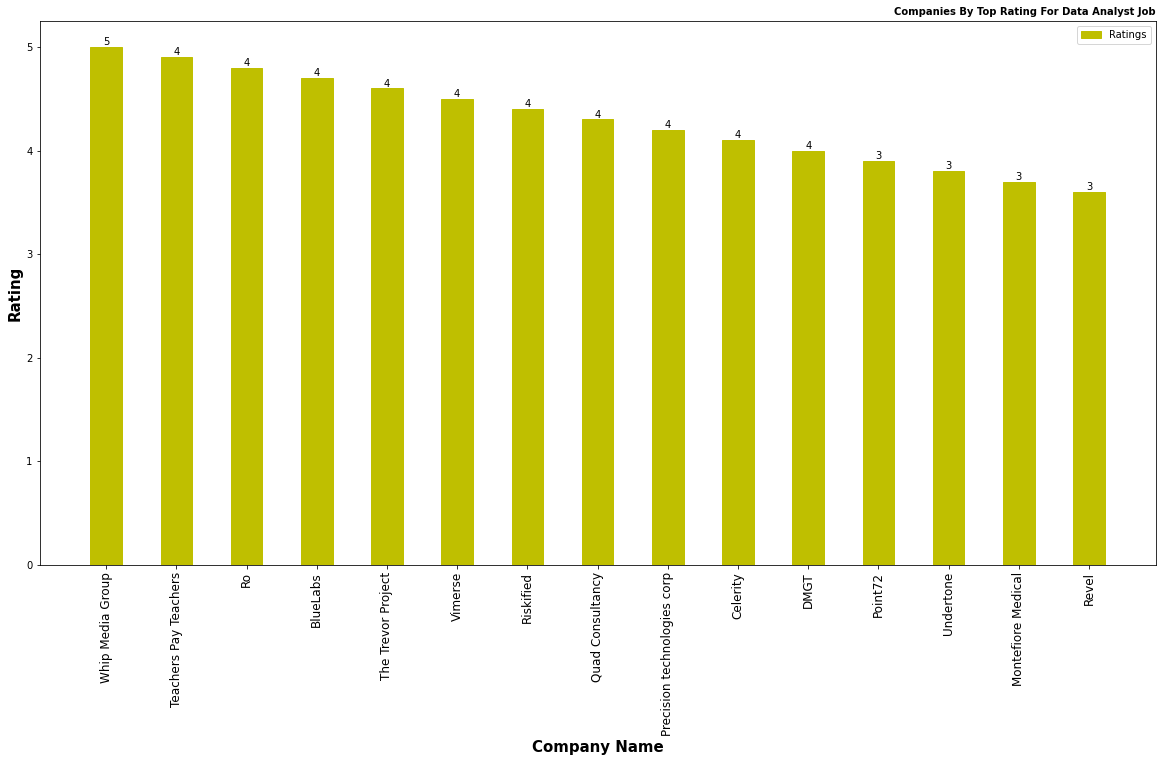

In [42]:
get_company_by_rating()

## Cities In CA with Min and Max Salary for Data Analyst Job

In [43]:
def get_cities_min_max_salary():
    conn = sql_connection()
    
    select_query = f'''SELECT location_city,min_salary,max_salary,location_state
                        FROM dataAnalystJob  
                        WHERE location_State = 'CA'
                        GROUP BY location_city
                        ORDER BY location_city DESC
                        LIMIT 15;'''
    
    cursor_obj = conn.cursor()
    
    cursor_obj.execute(select_query)
    
    rows = cursor_obj.fetchall()
    
    close_database_connection(conn)
    
    #print data in tabular form
    print("\n\n************** Tabular Representation ***************** \n\n")
    header_data = ['City','Min Salary','Max Salary','State']
    print_data_for_tier_two_analysis(header_data, rows)
    
   
    city = 0
    min_salary = 1
    max_salary = 2
    
   
    
    #set point for graph to draw graph for the above table
     
    title = "Cities In CA with Min & Max Salary For Data Analyst Jobs"
    x_label = "City Name"
    y_label = "Salary In USD"
    legend_text_arr = ['Min Salary', 'Max Salary']
    
    print("\n\n***************** Graph Representation ********************* \n\n")
    set_points_for_graph(rows,city, min_salary, title, x_label, y_label, title,max_salary, legend_text_arr)
    

Connection is established !!
Database connection closed!


************** Tabular Representation ***************** 


------------------------------------------------------------------------------------------------------------------------ 

City                     	 Min Salary               	 Max Salary               	 State                    	 

------------------------------------------------------------------------------------------------------------------------


Woodland Hills                	42000                         	66000                         	CA                            	

Whittier                      	113000                        	132000                        	CA                            	

Walnut Creek                  	47000                         	74000                         	CA                            	

Visalia                       	47000                         	81000                         	CA                            	

Venice                

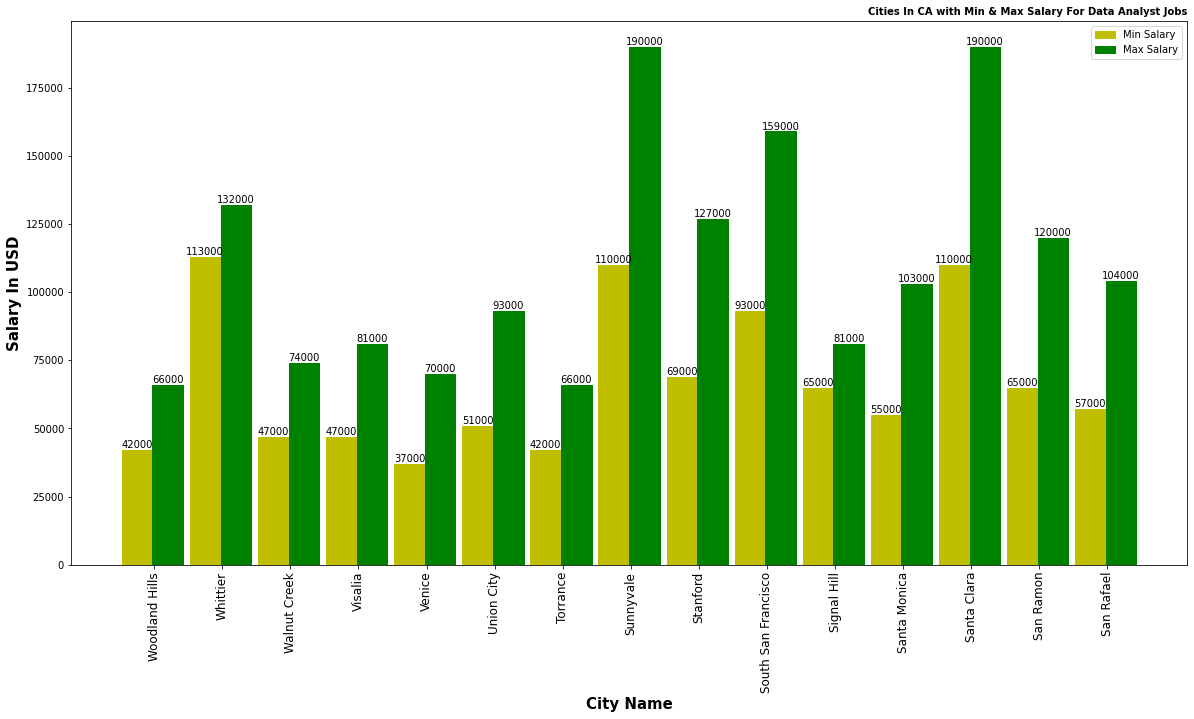

In [44]:
get_cities_min_max_salary()

## Companies Min and Max Salary By States

In [45]:
def get_companies_min_max_salary_rating():
    conn = sql_connection()
    
    select_query = f'''SELECT company_name ||', '|| location_state, min_salary,max_salary 
                        FROM {table_name} WHERE rating != 'None'
                        GROUP By location_state ORDER BY rating DESC
                        LIMIT 10 OFFSET 5;'''
    
    cursor_obj = conn.cursor()
    
    cursor_obj.execute(select_query)
    
    rows = cursor_obj.fetchall()
    
    close_database_connection(conn)
    
    
    #print data in tabular form
    print("\n\n************** Tabular Representation ***************** \n\n")
    header_data = ['Company Name, States', 'Min Salary', 'Max Salary']
    print_data_for_tier_two_analysis(header_data, rows)
    
    #set point for graph to draw graph for the above table
    company_name = 0
    min_salary = 1
    max_salary = 2
    
    title = " Companies with their Min and Max Salary By States "
    x_label = "Company Name and State"
    y_label = "Salary (IN USD )"
    legend_text_arr = ['Min Salary', 'Max Salary']
    
    print("\n\n***************** Graph Representation ********************* \n\n")
    set_points_for_graph(rows,company_name, min_salary, title, x_label, y_label, title,max_salary, legend_text_arr)


Connection is established !!
Database connection closed!


************** Tabular Representation ***************** 


------------------------------------------------------------------------------------------------------------------------ 

Company Name, States     	 Min Salary               	 Max Salary               	 

------------------------------------------------------------------------------------------------------------------------


N.F. Smith & Associates, TX   	29000                         	38000                         	

Mondo, DE                     	41000                         	78000                         	

Wintrust Financial, IL        	60000                         	66000                         	

CoreSite, CO                  	57000                         	67000                         	

Focal Systems, KS             	36000                         	67000                         	

Wells Fargo, NC               	50000                         	86000           

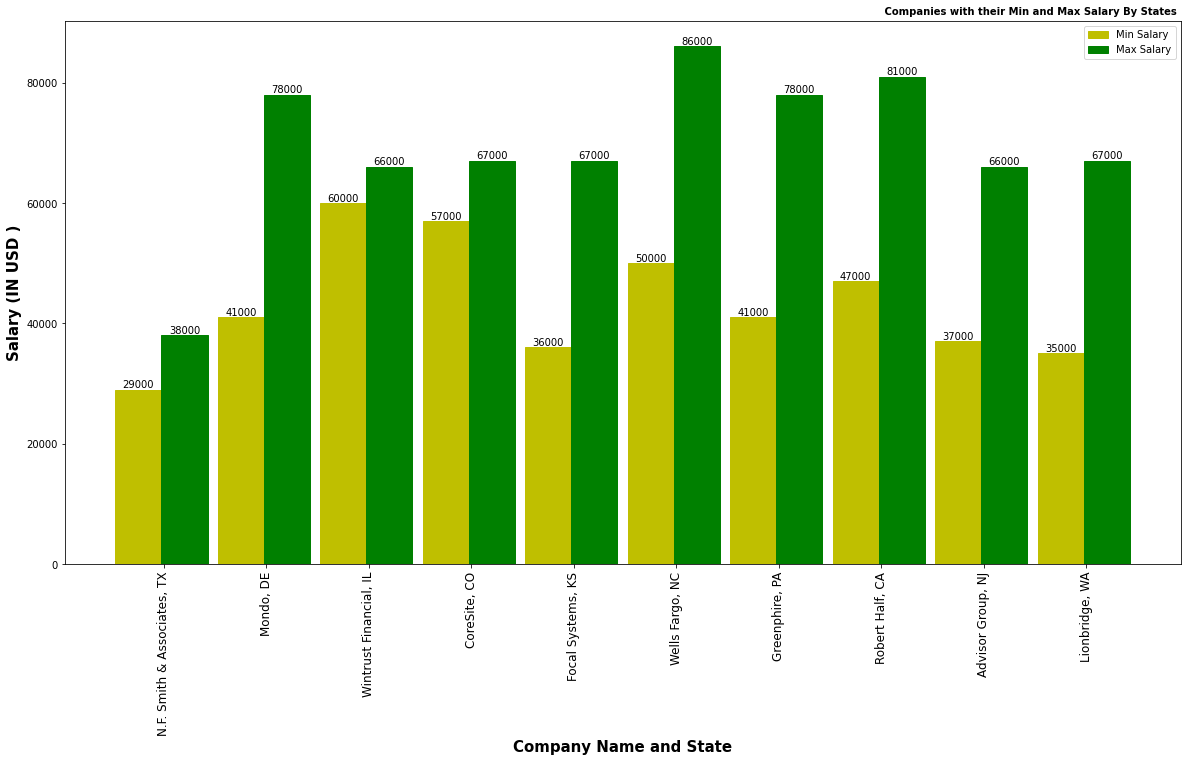

In [46]:
get_companies_min_max_salary_rating()

# Tier 3 Analysis

## This analysis will show that is there is any relation b/w the ratings and the salary given to the data analyst
        You can see that salary is not directly  proportional to ratings of the company

In [47]:
def get_max_salary_by_rating_and_company_count():
    conn = sql_connection()
    
    select_query = f'''SELECT cast(rating as int) || ' and '|| count(company_name) as rating_and_count,max_salary
                FROM {table_name} 
                WHERE rating != 'None'
                GROUP By cast(rating as int);'''
    
    
   
    cursor_obj = conn.cursor()
    
    cursor_obj.execute(select_query)
    
    rows = cursor_obj.fetchall()
    
    close_database_connection(conn)
    
    
    #print data in tabular form
    print("\n\n************** Tabular Representation ***************** \n\n")
    header_data = ['Rating & Company Count', 'Max Salary']
    print_data_for_tier_two_analysis(header_data, rows)
    
    #set point for graph to draw graph for the above table
    #rating = 0
    company_count = 0
    max_salary = 1
    
    title = " Relation between Ratings and Salary"
    x_label = "Ratings & Company Count"
    y_label = "Max Salary (IN USD )"
    legend_text_arr = ['Max Salary']
    
    print("\n\n***************** Graph Representation ********************* \n\n")
    set_points_for_graph(rows,company_count, max_salary, title, x_label, y_label, title, None, legend_text_arr)


Connection is established !!
Database connection closed!


************** Tabular Representation ***************** 


------------------------------------------------------------------------------------------------------------------------ 

   Rating & Company Count	                Max Salary	 

------------------------------------------------------------------------------------------------------------------------


                      1 and 18	                         88000	

                     2 and 186	                         87000	

                    3 and 1086	                         66000	

                     4 and 558	                         66000	

                     5 and 131	                         66000	



***************** Graph Representation ********************* 




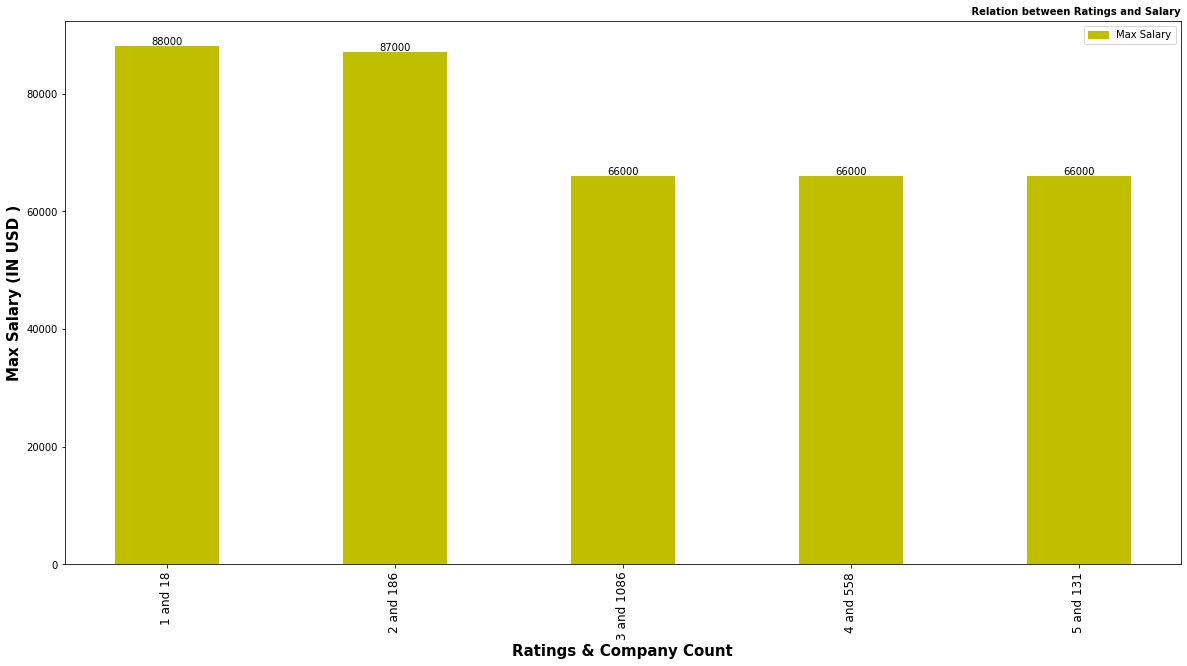

In [48]:
get_max_salary_by_rating_and_company_count()

## Is there any realtion b/w the size of the compnay and the average  salary of the data analyst?
        As we can see the company size is not directly proportional to the average salary of the data analyst.

In [49]:
def get_avg_salary_by_size_and_company_count():
    conn = sql_connection()
    
    select_query = f'''SELECT size || ' and '|| count(company_name) as size_and_count,
                    Round((avg( max_salary) + avg( min_salary))/2,0) as average_salary
                    FROM {table_name} 
                    WHERE size != 'None'
                    GROUP By size;'''
    
    
   
    cursor_obj = conn.cursor()
    
    cursor_obj.execute(select_query)
    
    rows = cursor_obj.fetchall()
    
    close_database_connection(conn)
    
    
    #print data in tabular form
    print("\n\n************** Tabular Representation ***************** \n\n")
    header_data = ['Size  & Company Count', 'Avg Salary']
    print_data_for_tier_two_analysis(header_data, rows)
    
    #set point for graph to draw graph for the above table
    #rating = 0
    size = 0
    avg_salary = 1
    
    title = " Relation between Company Size and Average Salary "
    x_label = "Size & Company Count"
    y_label = "Avg Salary (IN USD )"
    legend_text_arr = ['Avg Salary']
    
    print("\n\n***************** Graph Representation ********************* \n\n")
    set_points_for_graph(rows,size, avg_salary, title, x_label, y_label, title, None, legend_text_arr)

Connection is established !!
Database connection closed!


************** Tabular Representation ***************** 


------------------------------------------------------------------------------------------------------------------------ 

    Size  & Company Count	                Avg Salary	 

------------------------------------------------------------------------------------------------------------------------


               1 to 50 and 347	                       72712.0	

                10000+ and 374	                       69901.0	

          1001 to 5000 and 348	                       72869.0	

            201 to 500 and 248	                       71113.0	

          5001 to 10000 and 97	                       74201.0	

           501 to 1000 and 211	                       71988.0	

             51 to 200 and 421	                       72521.0	



***************** Graph Representation ********************* 




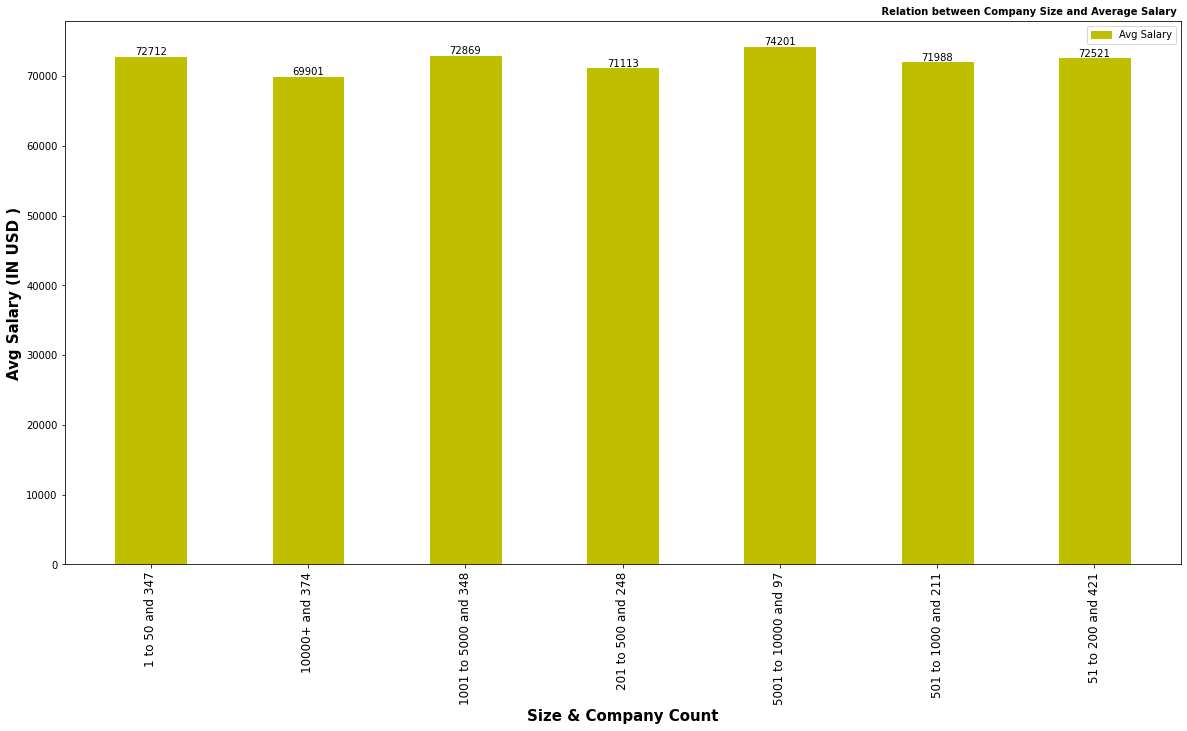

In [50]:
get_avg_salary_by_size_and_company_count()